<a href="https://colab.research.google.com/github/razaq1125/Cifar-10-Cnn/blob/main/cifar_10ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 8s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_test.shape

(10000, 1)

In [9]:
X_train[0].shape

(32, 32, 3)

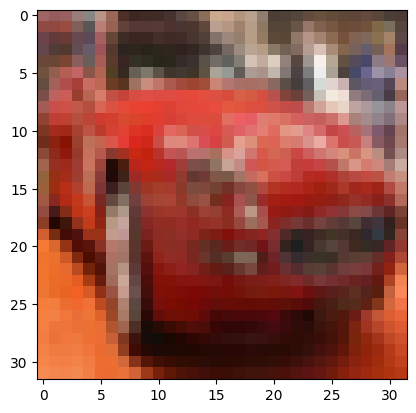

In [10]:
plt.imshow(X_train[5])

In [11]:
X_train[0].max()

255

In [12]:
X_test[0].max()

255

In [13]:
X_train = X_train/225

In [14]:
X_test = X_test/225

In [15]:
X_test.max()

1.1333333333333333

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_cat_train = to_categorical(y_train,10)

In [18]:
y_cat_test = to_categorical(y_test,10)

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [21]:
from warnings import filters
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(4, 4), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters = 32,kernel_size =(4,4)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))





In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [26]:
model.fit(X_train,y_cat_train,epochs=15,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 18s 5ms/step - loss: 1.4125 - accuracy: 0.4964 - val_loss: 1.1684 - val_accuracy: 0.5874
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0732 - accuracy: 0.6250 - val_loss: 1.1404 - val_accuracy: 0.6116
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9095 - accuracy: 0.6867 - val_loss: 0.9447 - val_accuracy: 0.6707
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7887 - accuracy: 0.7261 - val_loss: 0.9313 - val_accuracy: 0.6864
Epoch 5/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6830 - accuracy: 0.7636 - val_loss: 0.9766 - val_accuracy: 0.6745
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5909 - accuracy: 0.7946 - val_loss: 1.0233 - val_accuracy: 0.6867


In [27]:
metrics = pd.DataFrame(model.history.history)

In [28]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<Axes: >

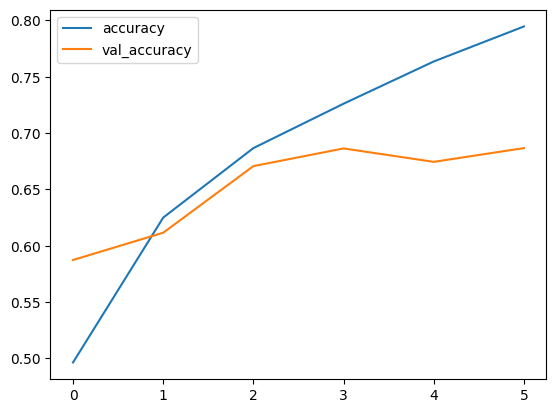

In [30]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

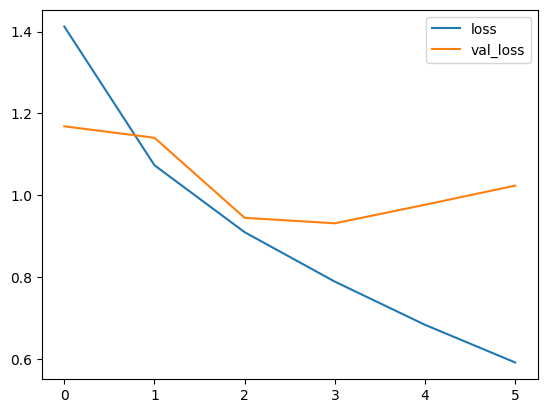

In [31]:
metrics[['loss','val_loss']].plot()

In [32]:
model.evaluate(X_test,y_cat_test,verbose=0)

[1.0233285427093506, 0.6866999864578247]

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
prediction = model.predict_classes(X_test)

AttributeError: ignored

In [37]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

313/313 [==============================] - 1s 2ms/step


In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.77      0.71      1000
           1       0.79      0.81      0.80      1000
           2       0.59      0.60      0.60      1000
           3       0.54      0.44      0.48      1000
           4       0.60      0.69      0.65      1000
           5       0.69      0.46      0.55      1000
           6       0.76      0.76      0.76      1000
           7       0.69      0.78      0.73      1000
           8       0.81      0.78      0.79      1000
           9       0.71      0.79      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000



In [40]:
predictions = np.argmax(model.predict(X_test),axis=1)

313/313 [==============================] - 1s 3ms/step


<Axes: >

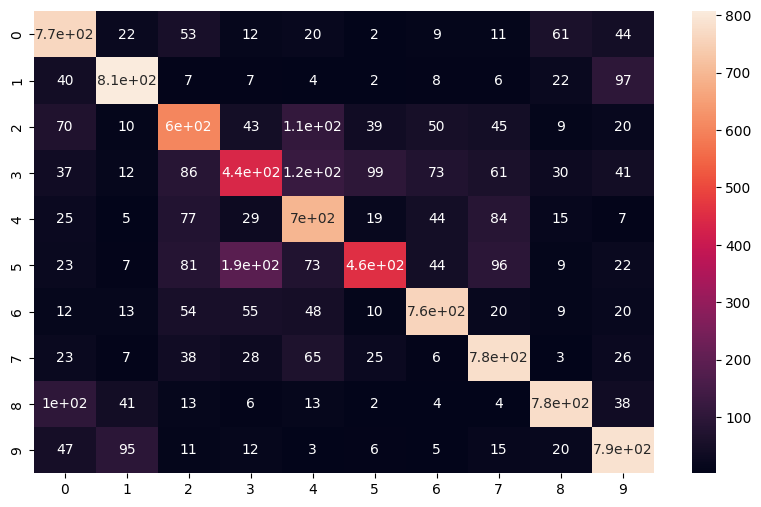

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [50]:
my_image = X_test[6]

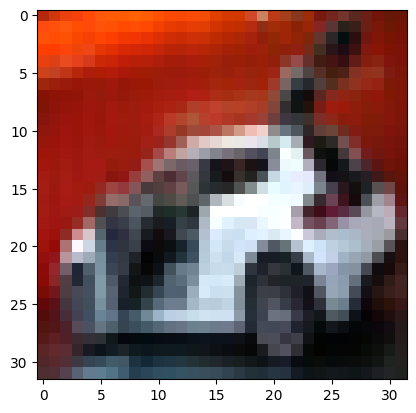

In [51]:
plt.imshow(my_image)

In [52]:
y_test[6]

array([1], dtype=uint8)